In [ ]:
from numpy.random import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
def sphere(xy):
    x, y = xy
    return x ** 2 + y ** 2

In [ ]:
minimum = (0.0, 0.0)

In [ ]:
class MultivariateNormal(object):
    def __init__(self):
        self.u_ = None
        self.sigma_ = None

    def fit(self, x):
        x = x[...,np.newaxis] if x.ndim == 2 else x
        self.u_ = x.mean(0)
        self.sig_ = np.einsum('ijk,ikj->jk',x-(self.u_),x-(self.u_)) / (x.shape[0])

In [ ]:
mod = MultivariateNormal()
mod.u_ = np.array([3.0, 3.0])
mod.sig_ = np.eye(2)
sigma = 0.5

In [ ]:
population = multivariate_normal(mod.u_, 0.1*mod.sig_, size=100)

In [ ]:
fitness = np.array([sphere(xy) for xy in population])

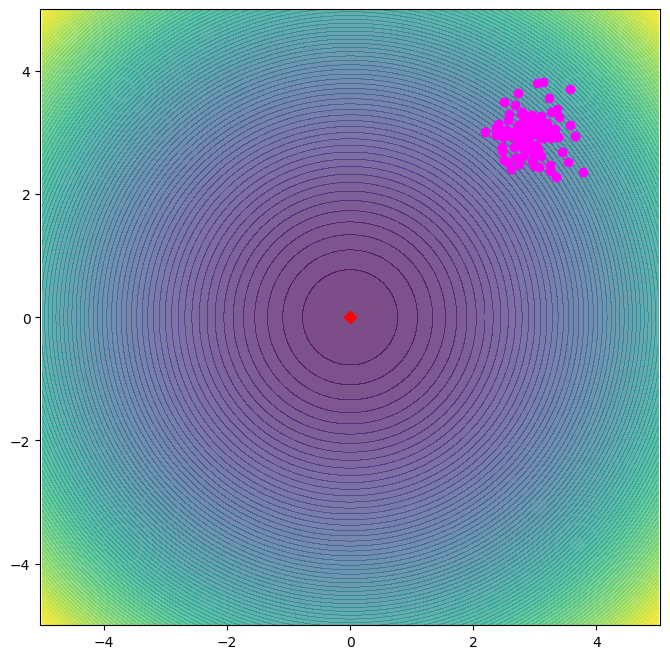

In [ ]:
x_lim = (-5, 5)
y_lim = (-5, 5)
n_seconds = 5
n_points = 100
x = np.linspace(*x_lim, n_points)
y = np.linspace(*y_lim, n_points)
X, Y = np.meshgrid(x, y)
Z = sphere([X, Y])

minimum = (0.0, 0.0)
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('equal')
ax.contourf(X, Y, Z, 90, cmap="viridis", alpha=0.7)
ax.scatter(population[:,0], population[:,1], c="magenta")
ax.plot(*minimum, "rD")

In [ ]:
selected_idx = np.argsort(fitness)[:len(fitness)//2]
fitness[selected_idx]
selection = population[selected_idx]

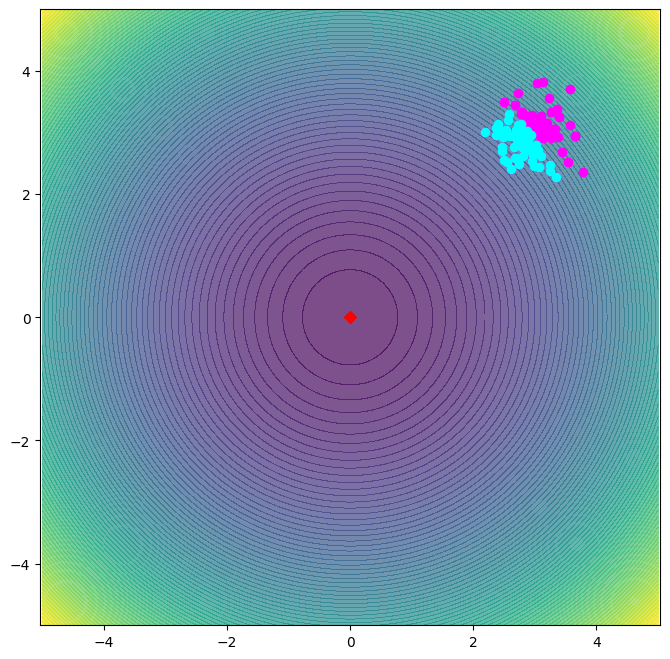

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('equal')
ax.contourf(X, Y, Z, 90, cmap="viridis", alpha=0.7)
ax.scatter(population[:,0], population[:,1], c="magenta")
ax.scatter(selection[:,0], selection[:,1], c="cyan")
ax.plot(*minimum, "rD")

In [ ]:
mod = MultivariateNormal()
mod.fit(selection)
print(mod.u_)
print(mod.sig_)

[[2.7610313 ]
 [2.81174998]]
[[ 0.05800704 -0.02940881]
 [-0.02940881  0.05845614]]


In [ ]:
population = multivariate_normal(mod.u_.squeeze(), sigma*mod.sig_, size=100)

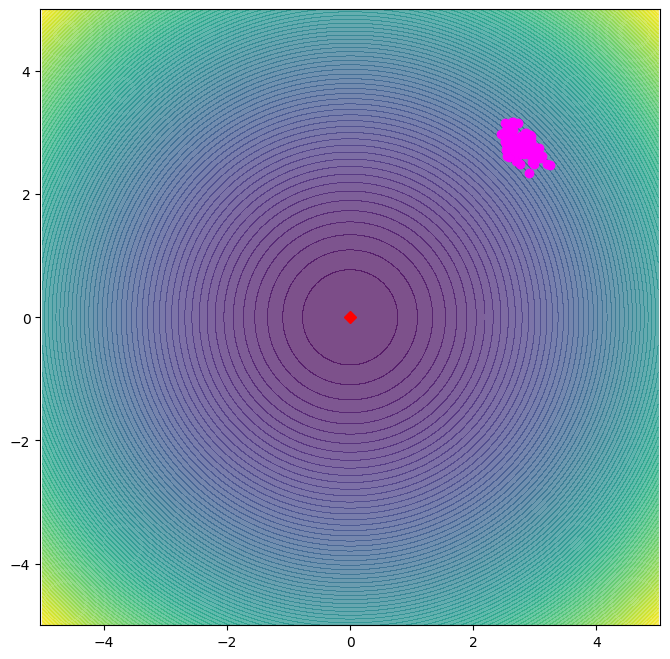

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('equal')
ax.contourf(X, Y, Z, 90, cmap="viridis", alpha=0.7)
ax.scatter(population[:,0], population[:,1], c="magenta")
ax.plot(*minimum, "rD")